# IEEE Coders Week
### Day 4 : Clustering (Unsupervised Learning)
#### By : Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer**

All of the work result below is done by me, based on every resources that have been given. Please contact me if you have any good suggestion.


# Data Preparation & Pre-Processing

### Import Important Library

In [1]:
!pip install -U yellowbrick

import warnings
warnings.filterwarnings("ignore")

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn import datasets, decomposition, preprocessing
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

### Import dataset from corresponding URL

In [3]:
!wget --no-check-certificate \
http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv \
  -O /content/WCD.csv

--2020-06-05 17:45:03--  http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [text/plain]
Saving to: ‘/content/WCD.csv’

/content/WCD.csv    100%[===================>]  14.67K  --.-KB/s    in 0.08s   

2020-06-05 17:45:03 (188 KB/s) - ‘/content/WCD.csv’ saved [15021/15021]



### Dataset Information

In [4]:
df = pd.read_csv('/content/WCD.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Breakdown channel and region

In [7]:
#Based on the http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/readme.txt 
df.loc[df['Channel']==1, 'Horeca']=1
df.loc[df['Channel']!=1, 'Horeca']=0
df.loc[df['Channel']==2, 'Retail']=1
df.loc[df['Channel']!=2, 'Retail']=0
df.loc[df['Region']==1, 'Lisbon']=1
df.loc[df['Region']!=1, 'Lisbon']=0
df.loc[df['Region']==2, 'Oporto']=1
df.loc[df['Region']!=2, 'Oporto']=0
df.loc[df['Region']==3, 'Others']=1
df.loc[df['Region']!=3, 'Others']=0

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,2,3,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,2,3,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,2,3,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,1,3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,2,3,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0


### Exploring Data

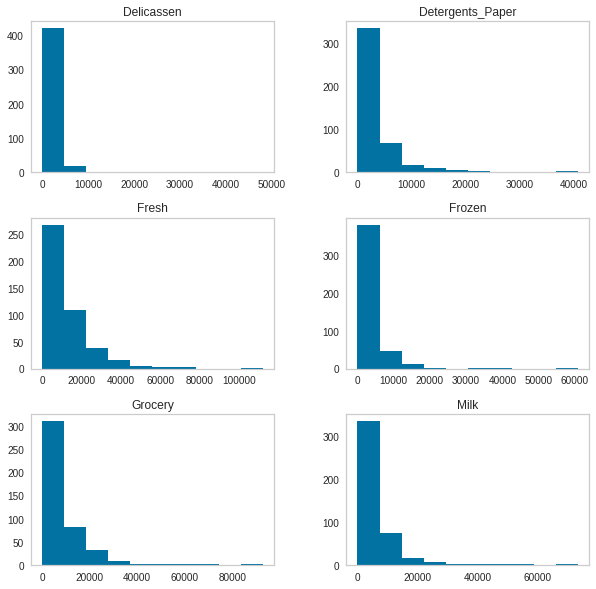

In [8]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].hist(figsize=(10,10), grid=False)
plt.show()

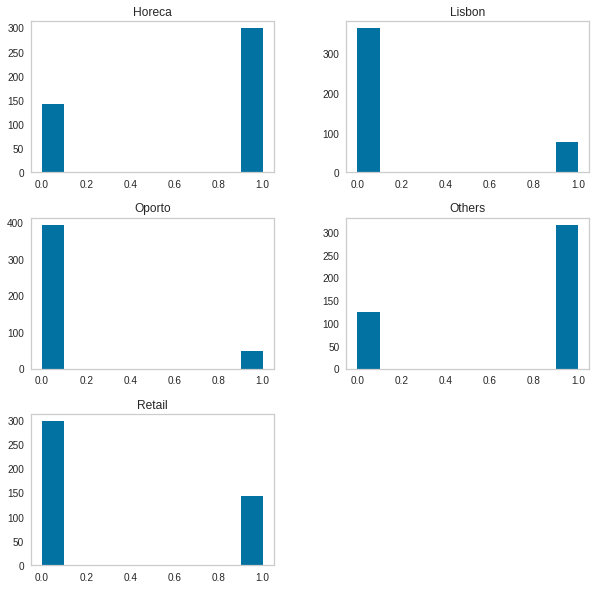

In [9]:
df[['Horeca','Retail','Lisbon','Oporto','Others']].hist(figsize=(10,10), grid=False)
plt.show()

### Preparing Data

In [0]:
#Dropping channel & region row
df=df.drop(['Channel','Region'], axis=1)

In [0]:
normalizing = preprocessing.quantile_transform(df, output_distribution='normal')

In [0]:
prepscale = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(normalizing)
scale = prepscale.transform(normalizing)

### Exploring data after being normalized

In [13]:
df_scaled = pd.DataFrame(scale, columns=df.columns)
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0.540419,0.594951,0.536848,0.360119,0.545271,0.531583,0.0,1.0,0.0,0.0,1.0
1,0.485393,0.598596,0.555348,0.510730,0.551504,0.561963,0.0,1.0,0.0,0.0,1.0
2,0.479249,0.588044,0.539223,0.533326,0.556649,0.718982,0.0,1.0,0.0,0.0,1.0
3,0.544048,0.414432,0.491478,0.612644,0.476995,0.564004,1.0,0.0,0.0,0.0,1.0
4,0.602387,0.536258,0.533326,0.572481,0.531583,0.678264,0.0,1.0,0.0,0.0,1.0


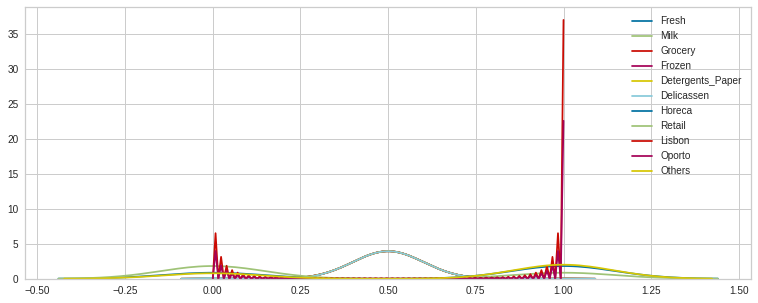

In [14]:
plt.figure(figsize = (13,5))
for i in df.columns:
    sns.kdeplot(df_scaled[i])

# Creating Model & Result (K-Means Clustering)

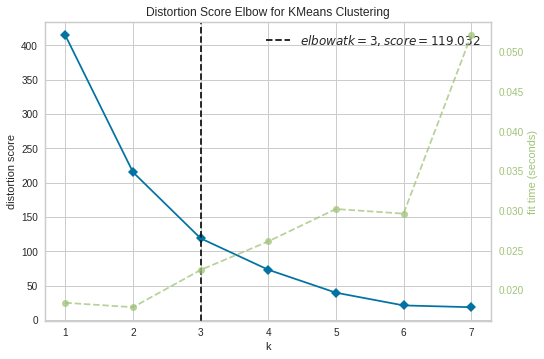

In [15]:
vis=KElbowVisualizer(KMeans(), k=(1,8))
vis.fit(df_scaled)
vis.show()

### Creating Model with 3 cluster (Recommendation)

In [0]:
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

### Visualization with 3 cluster

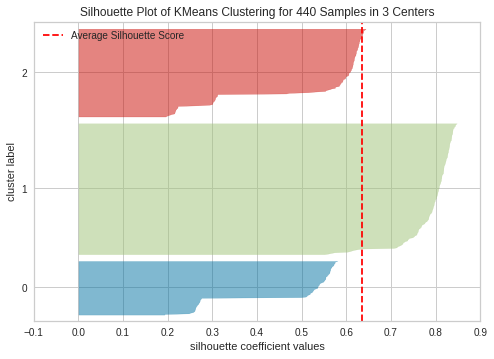

Score =  63.593416152838735 %


In [17]:
visualize=SilhouetteVisualizer(clusterer,colors='yellowbrick')
visualize.fit(df_scaled)
visualize.show()

score = silhouette_score(df_scaled, cluster_labels, metric='euclidean')
print("Score = ", score*100, "%")

Due to a bad Score, I'm gonna try to split it to 6 cluster.

### Creating model with 6 cluster

In [0]:
clusterer = KMeans(n_clusters=6, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

### Visualization with 6 cluster

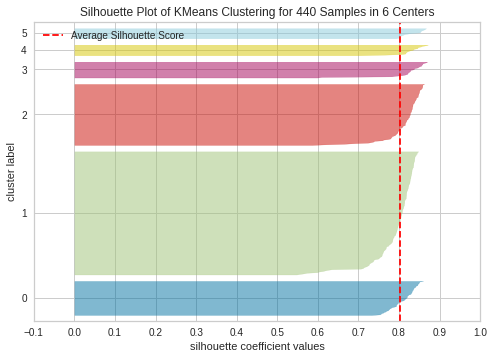

Score =  80.33156066651588 %


In [19]:
visualize=SilhouetteVisualizer(clusterer,colors='yellowbrick')
visualize.fit(df_scaled)
visualize.show()

score = silhouette_score(df_scaled, cluster_labels, metric='euclidean')
print("Score = ", score*100, "%")

<Figure size 720x360 with 0 Axes>

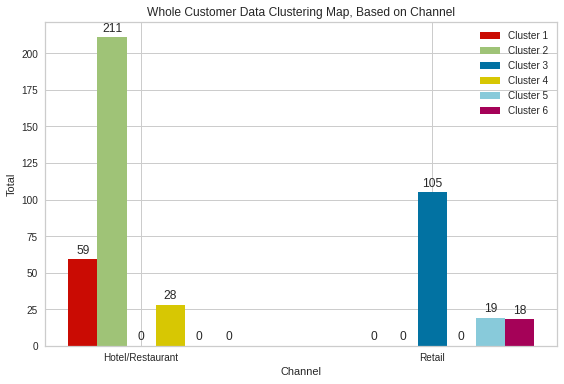

In [21]:
class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []

from_horeca0 = df[(df['Horeca'] == 1) & (df['cluster'] == 0)]
from_horeca1 = df[(df['Horeca'] == 1) & (df['cluster'] == 1)]
from_horeca2 = df[(df['Horeca'] == 1) & (df['cluster'] == 2)]
from_horeca3 = df[(df['Horeca'] == 1) & (df['cluster'] == 3)]
from_horeca4 = df[(df['Horeca'] == 1) & (df['cluster'] == 4)]
from_horeca5 = df[(df['Horeca'] == 1) & (df['cluster'] == 5)]
from_retail0 = df[(df['Retail'] == 1) & (df['cluster'] == 0)]
from_retail1 = df[(df['Retail'] == 1) & (df['cluster'] == 1)]
from_retail2 = df[(df['Retail'] == 1) & (df['cluster'] == 2)]
from_retail3 = df[(df['Retail'] == 1) & (df['cluster'] == 3)]
from_retail4 = df[(df['Retail'] == 1) & (df['cluster'] == 4)]
from_retail5 = df[(df['Retail'] == 1) & (df['cluster'] == 5)]

class0.append(from_horeca0['Horeca'].count())
class0.append(from_retail0['Retail'].count())
class1.append(from_horeca1['Horeca'].count())
class1.append(from_retail1['Retail'].count())
class2.append(from_horeca2['Horeca'].count())
class2.append(from_retail2['Retail'].count())
class3.append(from_horeca3['Horeca'].count())
class3.append(from_retail3['Retail'].count())
class4.append(from_horeca4['Horeca'].count())
class4.append(from_retail4['Retail'].count())
class5.append(from_horeca5['Horeca'].count())
class5.append(from_retail5['Retail'].count())

index = np.arange(2)
bar_width = 0.1

plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
rects1 = ax.bar(index - 0.2, class0, bar_width, color='r', label='Cluster 1', align="center")
rects2 = ax.bar(index - 0.1, class1, bar_width, color='g', label='Cluster 2', align="center")
rects3 = ax.bar(index - 0.0, class2, bar_width, color='b', label='Cluster 3', align="center")
rects4 = ax.bar(index + 0.1, class3, bar_width, color='y', label='Cluster 4', align="center")
rects5 = ax.bar(index + 0.2, class4, bar_width, color='c', label='Cluster 5', align="center")
rects6 = ax.bar(index + 0.3, class5, bar_width, color='m', label='Cluster 6', align="center")

plt.xlabel('Channel')
plt.ylabel('Total')
plt.title('Whole Customer Data Clustering Map, Based on Channel')
plt.xticks(index, ("Hotel/Restaurant", "Retail"))
plt.legend()
plt.tight_layout()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")

plt.show()

We can assume that from Hotel/Restaurant/Cafe is defined to Cluster 1,2,4

From Retail is defined to Cluster 3,5,6

Further usage in every cluster :

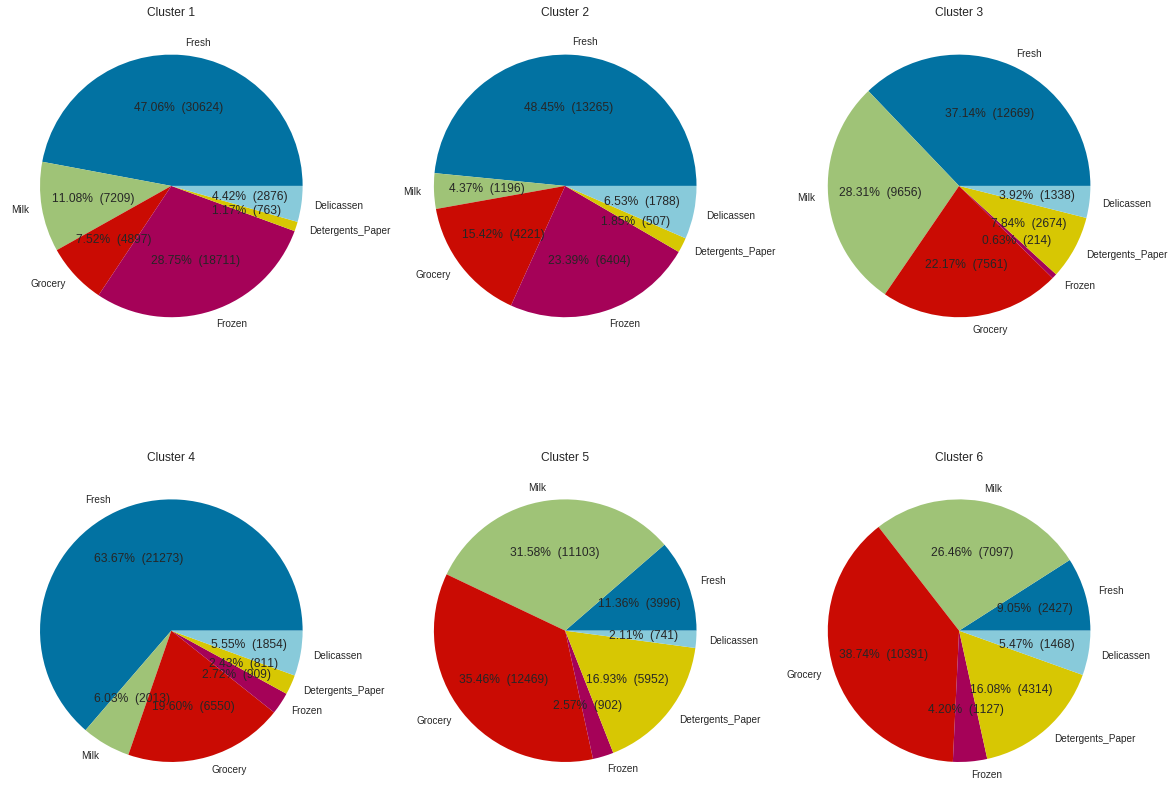

In [22]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

viewdf = df.copy()
viewdf['cluster'] = cluster_labels

fig, axs = plt.subplots(2, 3,figsize=(20,15))

d1=viewdf[viewdf['cluster']==0][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label1=d1.columns.tolist()
values1=d1.iloc[0]

d2=viewdf[viewdf['cluster']==1][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label2=d2.columns.tolist()
values2=d2.iloc[0]

d3=viewdf[viewdf['cluster']==2][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label3=d3.columns.tolist()
values3=d3.iloc[0]

d4=viewdf[viewdf['cluster']==3][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label4=d4.columns.tolist()
values4=d4.iloc[0]

d5=viewdf[viewdf['cluster']==4][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label5=d5.columns.tolist()
values5=d5.iloc[0]

d6=viewdf[viewdf['cluster']==5][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label6=d6.columns.tolist()
values6=d6.iloc[0]

axs[0, 0].pie(x=values1,labels=label1, autopct=make_autopct(values1))
axs[0, 0].set_title('Cluster 1')
axs[0, 1].pie(x=values2,labels=label2, autopct=make_autopct(values2))
axs[0, 1].set_title('Cluster 2')
axs[0, 2].pie(x=values3,labels=label3, autopct=make_autopct(values3))
axs[0, 2].set_title('Cluster 3')
axs[1, 0].pie(x=values4,labels=label4, autopct=make_autopct(values4))
axs[1, 0].set_title('Cluster 4')
axs[1, 1].pie(x=values5,labels=label5, autopct=make_autopct(values5))
axs[1, 1].set_title('Cluster 5')
axs[1, 2].pie(x=values6,labels=label6, autopct=make_autopct(values6))
axs[1, 2].set_title('Cluster 6')
plt.show()